In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path="C:\\Users\\craig\\Documents\\Python Scripts\\Notebooks\\2nd Capstone Project\\RAW_Data"
os.chdir(path) 


In [3]:
df = pd.read_csv('Airbnb_Chicago_Cleaned.csv', index_col = 0)

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.drop(df[df['price'] > 900].index, inplace = True) 

In [6]:
df.head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Cable_TV,Wifi,Air_conditioning,Kitchen,Paid_parking_off_premises,Elevator,Buzzer/wireless_intercom,Heating,Washer,Dryer,Smoke_detector,Carbon_monoxide_detector,Fire_extinguisher,Essentials,Hangers,Iron,Laptop_friendly_workspace,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,Self_check-in,Lockbox,Hot_water,Microwave,Refrigerator,Dishes_and_silverware,Cooking_basics,Oven,Stove,Long_term_stays_allowed,Breakfast,Free_street_parking,First_aid_kit,Shampoo,Hair_dryer,Bed_linens,Extra_pillows_and_blankets,Coffee_maker,Cleaning_before_checkout,Host_greets_you,Paid_parking_on_premises,Shower_gel,Trash_can,Internet,Free_parking_on_premises,Pets_live_on_this_property,Family/kid_friendly,24-hour_check-in,Private_entrance,Bathtub,Dishwasher,BBQ_grill,Patio_or_balcony,Garden_or_backyard,Luggage_dropoff_allowed,Baking_sheet,Barbecue_utensils,Room-darkening_shades,Children’s_dinnerware,Game_console,Safety_card,Lock_on_bedroom_door,Children’s_books_and_toys,Pack_’n_Play/travel_crib,Lake_access,Building_staff,Wheelchair_accessible,Pets_allowed,Suitable_for_events,Keypad,Smart_lock,Private_living_room,Ethernet_connection,Indoor_fireplace,Beach_essentials,Stair_gates,Other,Fireplace_guards,Wide_entrance_for_guests,Well-lit_path_to_entrance,High_chair,Single_level_home,Outlet_covers,Baby_bath,Babysitter_recommendations,Body_soap,Bath_towel,Toilet_paper,Bedroom_comforts,Bathroom_essentials,Hot_tub,Doorman,Gym,Smoking_allowed,Gas_oven,Memory_foam_mattress,Walk-in_shower,Full_kitchen,Pool,Smart_TV,Netflix,Hot_water_kettle,Crib,Baby_monitor,Wide_entrance
0,1947,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100.0,100.0,f,River North,4,4,t,t,"Chicago, IL, United States",Near North Side,Near North Side,1.0,"Chicago, IL",41.90246,-87.63405,t,Apartment,Entire home/apt,2,1.0,0,1.0,Real Bed,"['TV', 'Cable_TV', 'Wifi', 'Air_conditioning',...",59.0,$100.00,$0.00,1,$0.00,14,t,0,3,3,3,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,f,f,7,7,0,0,0.06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,F

In [7]:
df['room_type'].unique()
#textual processing is probably unnecesasry for now.

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
df['description_count'] = df['description'].str.count(" ")

In [10]:
df['house_rules_count'] = df['house_rules'].str.count(" ")

In [11]:
df['host_about_count'] = df['host_about'].str.count(" ")

In [27]:
df['rounded_reviews_per_month'] = np.round_(df['reviews_per_month'], decimals=0)

In [9]:
df['amenity_count'] = df['amenities'].str.count(",")

In [12]:
to_drop = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_since', 'host_location', 'host_about', 'host_neighbourhood', 'street', 'neighbourhood', 'zipcode', 'smart_location', 'is_location_exact' , 'amenities', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people','has_availability', 'first_review', 'last_review' ]

In [15]:
df = df.drop(to_drop, axis=1)

In [18]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Cable_TV,Wifi,Air_conditioning,Kitchen,Paid_parking_off_premises,Elevator,Buzzer/wireless_intercom,Heating,Washer,Dryer,Smoke_detector,Carbon_monoxide_detector,Fire_extinguisher,Essentials,Hangers,Iron,Laptop_friendly_workspace,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,Self_check-in,Lockbox,Hot_water,Microwave,Refrigerator,Dishes_and_silverware,Cooking_basics,Oven,Stove,Long_term_stays_allowed,Breakfast,Free_street_parking,First_aid_kit,Shampoo,Hair_dryer,Bed_linens,Extra_pillows_and_blankets,Coffee_maker,Cleaning_before_checkout,Host_greets_you,Paid_parking_on_premises,Shower_gel,Trash_can,Internet,Free_parking_on_premises,Pets_live_on_this_property,Family/kid_friendly,24-hour_check-in,Private_entrance,Bathtub,Dishwasher,BBQ_grill,Patio_or_balcony,Garden_or_backyard,Luggage_dropoff_allowed,Baking_sheet,Barbecue_utensils,Room-darkening_shades,Children’s_dinnerware,Game_console,Safety_card,Lock_on_bedroom_door,Children’s_books_and_toys,Pack_’n_Play/travel_crib,Lake_access,Building_staff,Wheelchair_accessible,Pets_allowed,Suitable_for_events,Keypad,Smart_lock,Private_living_room,Ethernet_connection,Indoor_fireplace,Beach_essentials,Stair_gates,Other,Fireplace_guards,Wide_entrance_for_guests,Well-lit_path_to_entrance,High_chair,Single_level_home,Outlet_covers,Baby_bath,Babysitter_recommendations,Body_soap,Bath_towel,Toilet_paper,Bedroom_comforts,Bathroom_essentials,Hot_tub,Doorman,Gym,Smoking_allowed,Gas_oven,Memory_foam_mattress,Walk-in_shower,Full_kitchen,Pool,Smart_TV,Netflix,Hot_water_kettle,Crib,Baby_monitor,Wide_entrance,description_count,amenity_count,house_rules_count,host_about_count
0,1947,within an hour,100.0,100.0,f,4,4,t,t,Near North Side,41.90246,-87.63405,Apartment,Entire home/apt,2,1.0,0,1.0,Real Bed,59.0,14,0,3,3,3,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,f,f,7,7,0,0,0.06,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,162,29,79,64
1,2384,within an hour,100.0,100.0,t,1,1,t,t,Hyde Park,41.78790,-87.58780,Condominium,Private room,1,1.0,1,1.0,Real Bed,55.0,2,22,50,77,322,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.76,True,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,978.0,5.364328e+06,3.062866e+06,1947.00000,2.689901e+06,5.872202e+06,7.916135e+06,1.070998e+07
host_response_rate,843.0,9.550178e+01,1.383989e+01,0.00000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
host_acceptance_rate,937.0,8.538634e+01,2.103680e+01,0.00000,8.000000e+01,9.500000e+01,1.000000e+02,1.000000e+02
host_listings_count,978.0,9.185072e+00,4.698870e+01,0.00000,1.000000e+00,2.000000e+00,4.000000e+00,7.690000e+02
host_total_listings_count,978.0,9.185072e+00,4.698870e+01,0.00000,1.000000e+00,2.000000e+00,4.000000e+00,7.690000e+02
latitude,978.0,4.191112e+01,5.671364e-02,41.65156,4.188964e+01,4.191806e+01,4.194519e+01,4.202139e+01
longitude,978.0,-8.766904e+01,3.912106e-02,-87.80845,-8.768794e+01,-8.766795e+01,-8.764780e+01,-8.754165e+01
accommodates,978.0,3.812883e+00,2.598866e+00,1.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
bathrooms,978.0,1.348160e+00,8.012284e-01,0.00000,1.000000e+00,1.000000e+00,1.500000e+00,1.100000e+01
bedrooms,978.0,1.557260e+00,9.301575e-01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00


In [32]:
columns_list = ['host_response_rate', 'host_acceptance_rate','host_total_listings_count', 'accommodates', 
                'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'description_count', 
                'amenity_count', 'house_rules_count', 'host_about_count', 'rounded_reviews_per_month']

In [24]:
reduced_list = ['accommodates','bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating','description_count', 'amenity_count', 'house_rules_count', 'host_about_count', 'rounded_reviews_per_month' ]

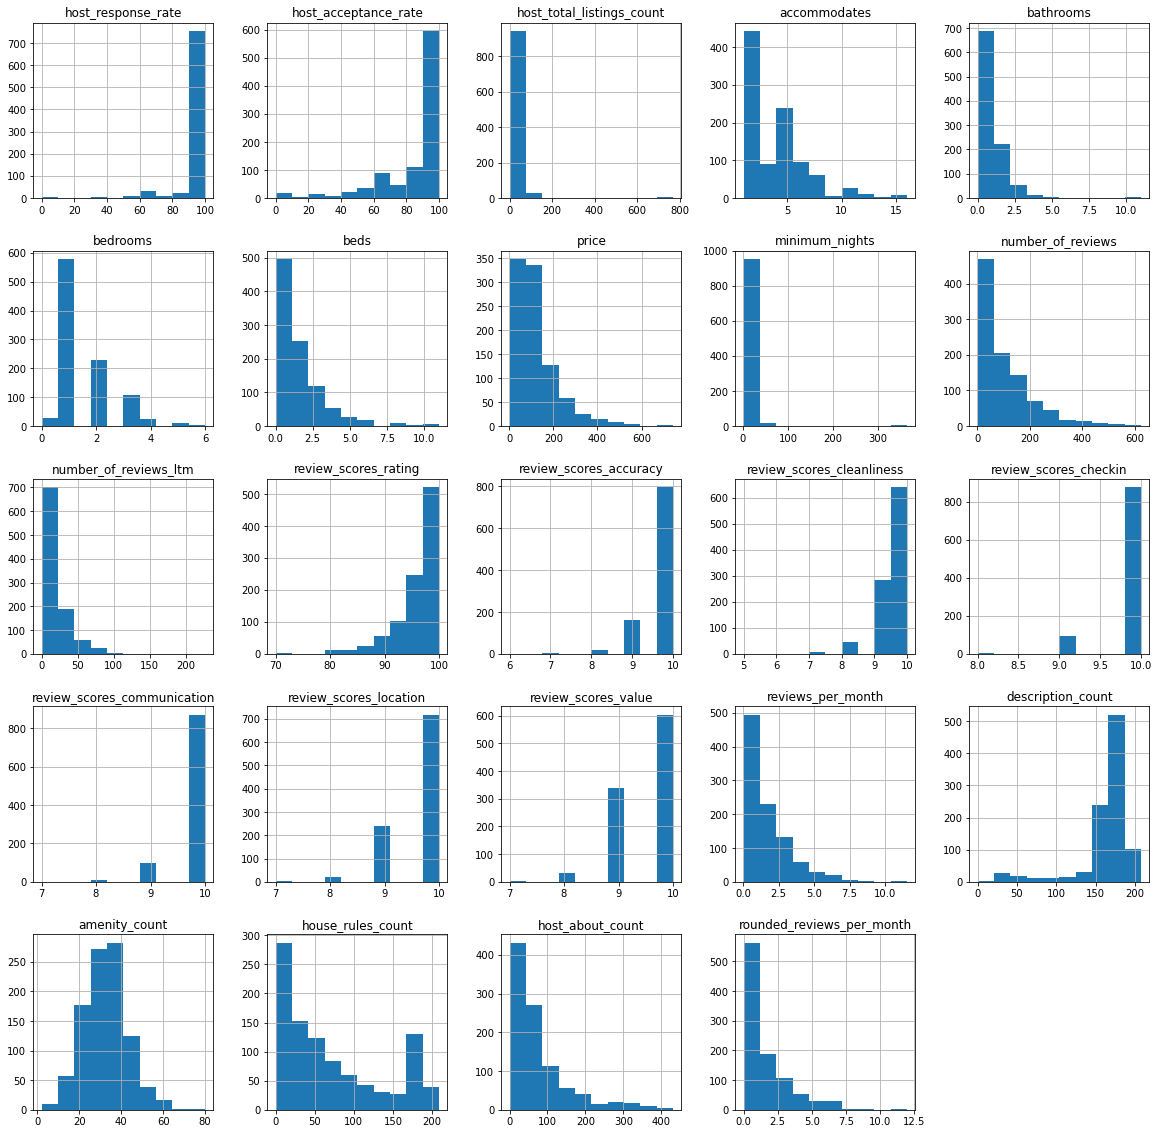

In [33]:
hist = df[columns_list].hist(bins=10,figsize =(20,20))

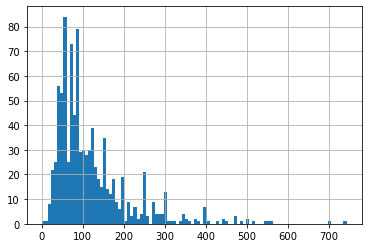

In [23]:
df['price'].hist(bins=100)

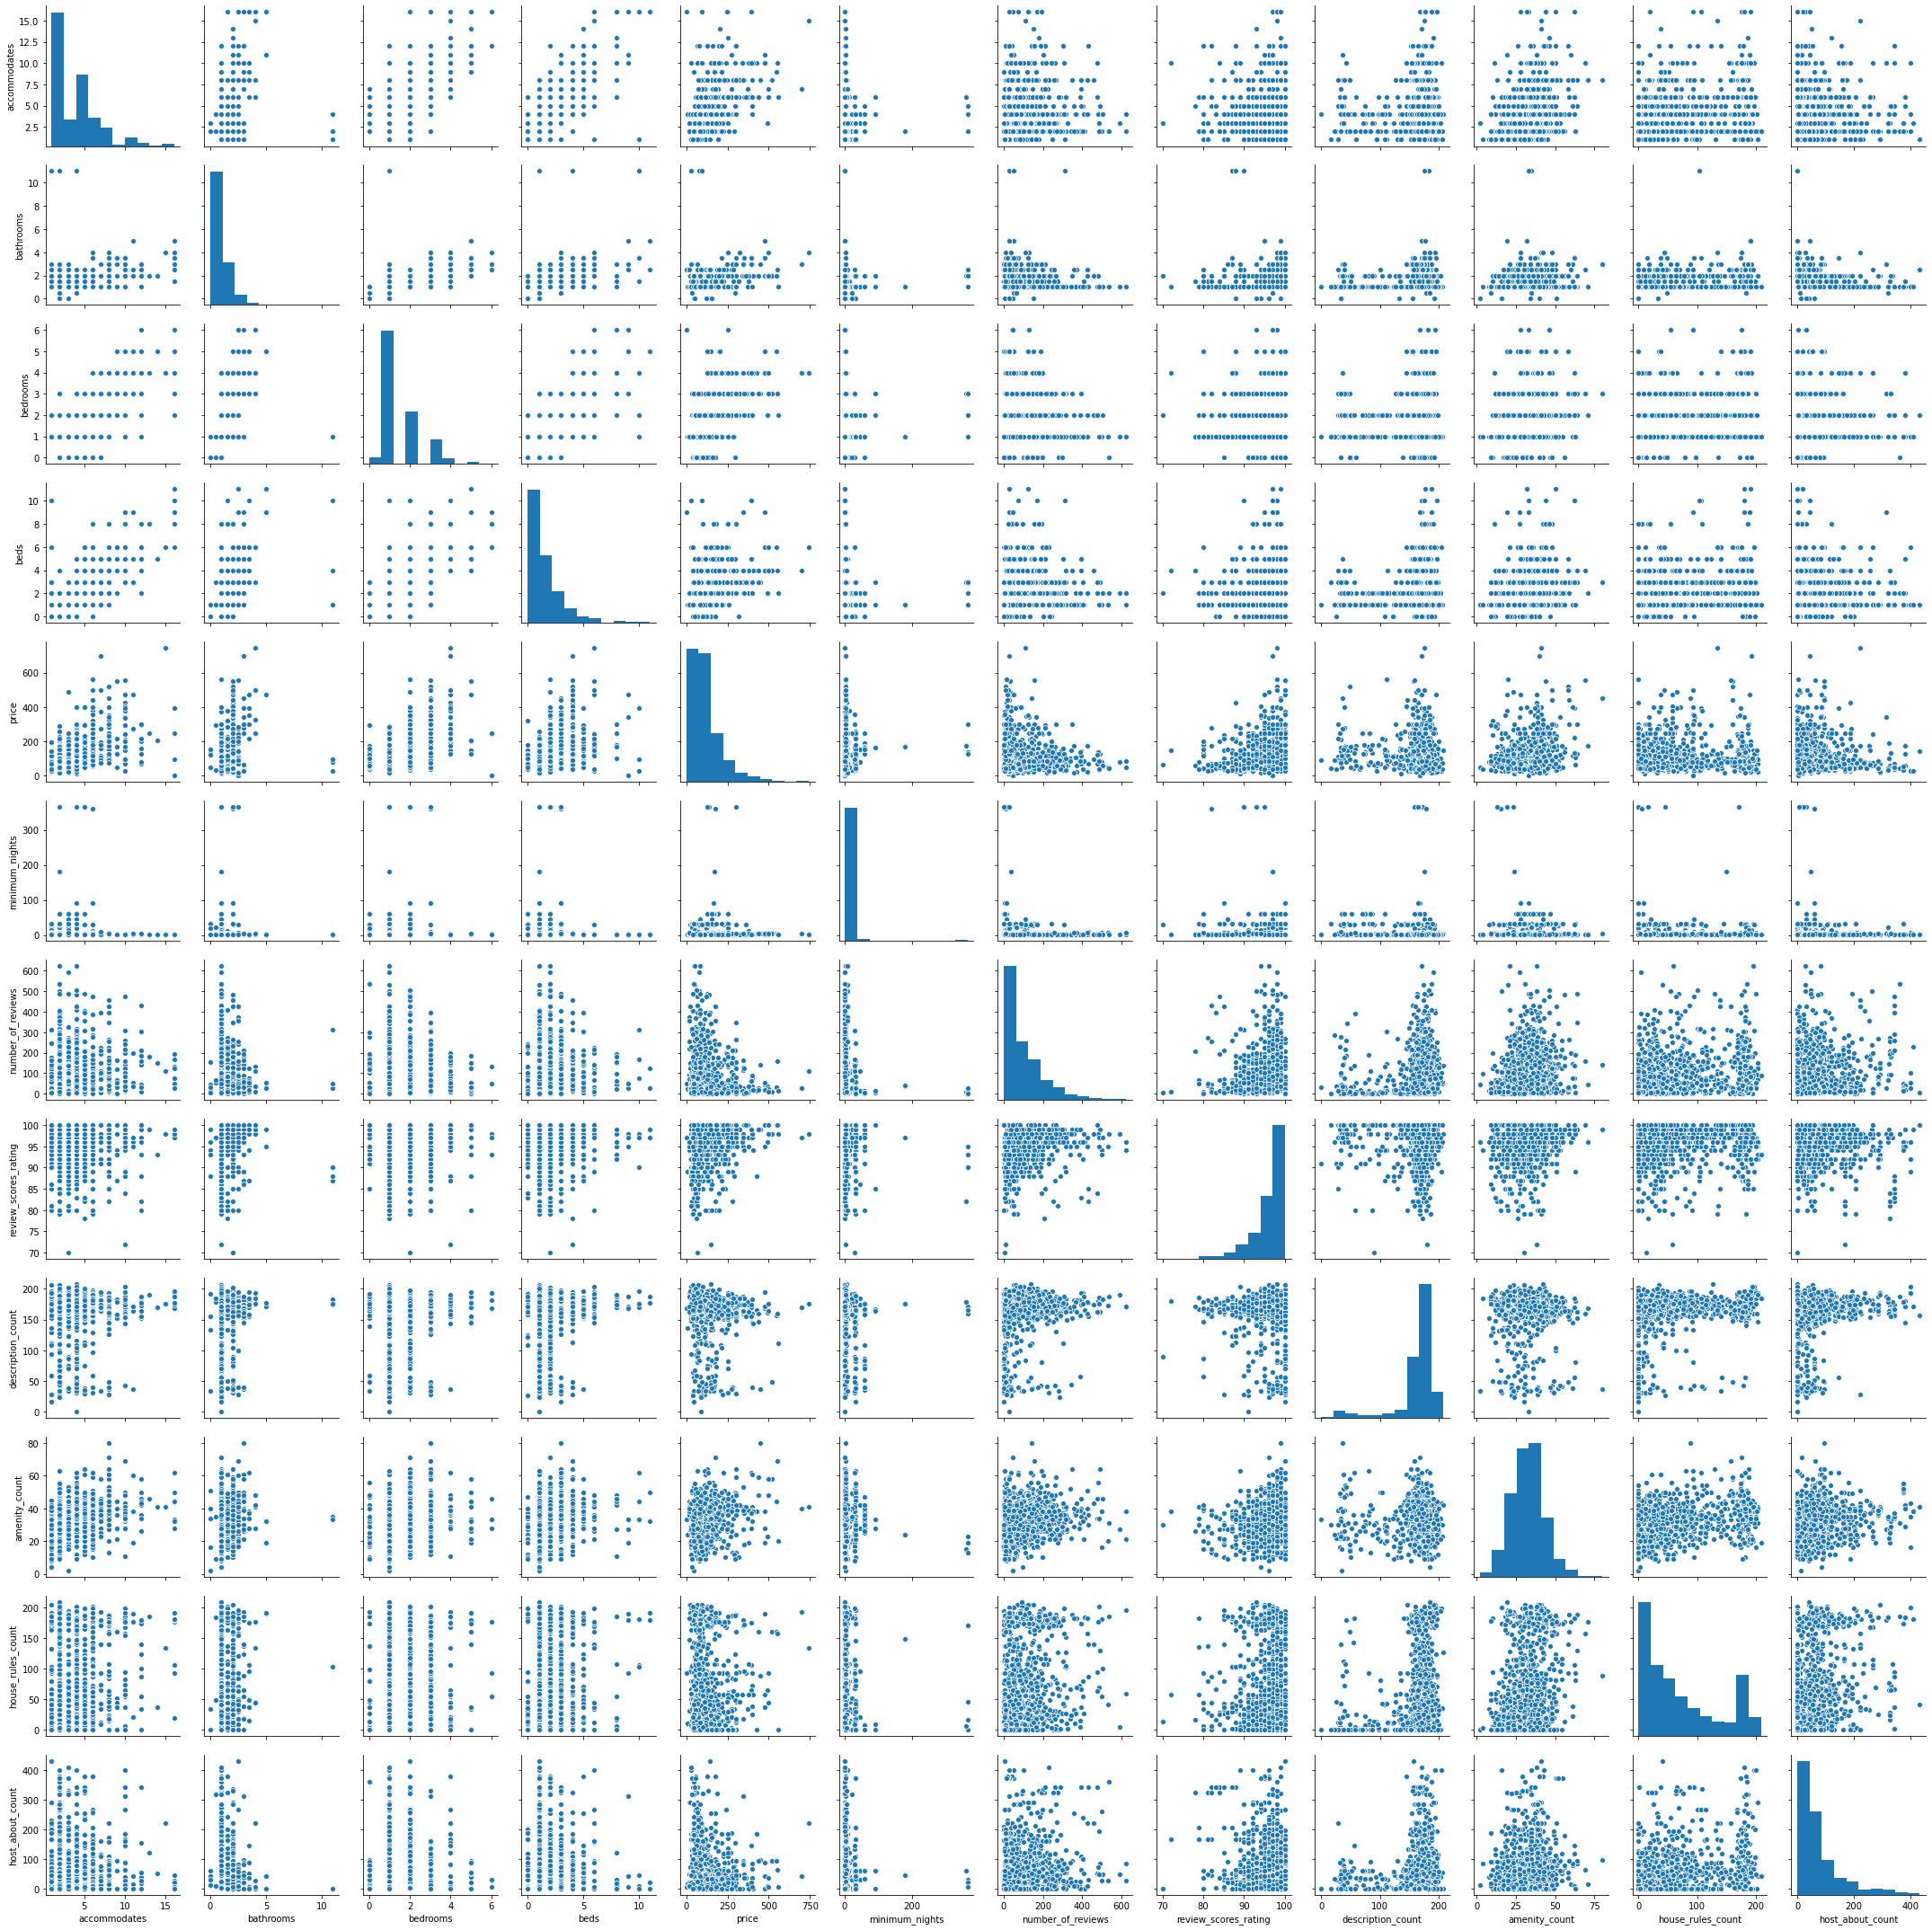

In [25]:
sns.pairplot(df[reduced_list])

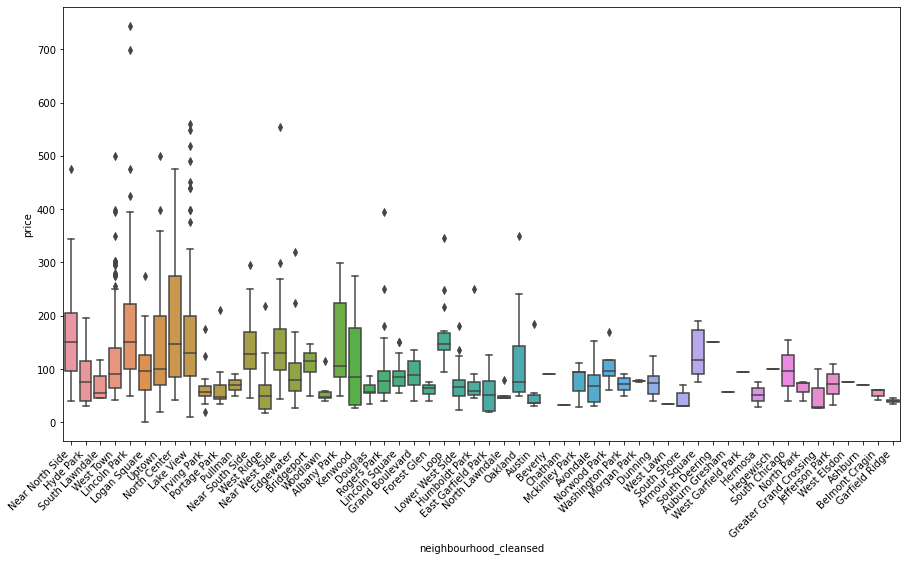

In [48]:
plt.figure(figsize=(15,8))
pricebox = sns.boxplot(x="neighbourhood_cleansed", y="price", data=df)

pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [16]:
#maybe only include neighborhoods with a lot of observations.  and use 'other' as well
#powerscores, qmap, 
#linear models don't handle colineareity well, tree based models handle this better.  


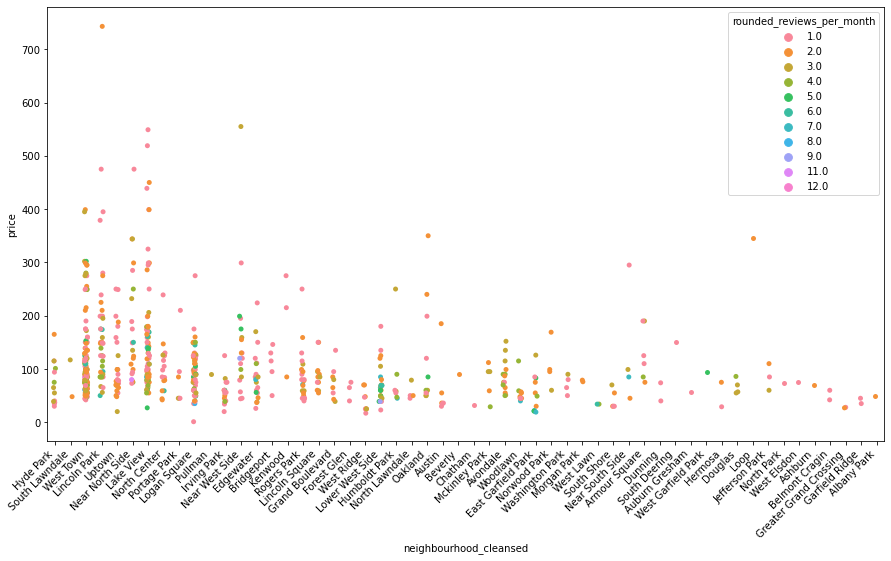

In [47]:
df_rounded = df.query('rounded_reviews_per_month>0.0')

plt.figure(figsize=(15,8))
pricebox = sns.stripplot(x="neighbourhood_cleansed", y="price", hue='rounded_reviews_per_month', data=df_rounded, jitter=True)
pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

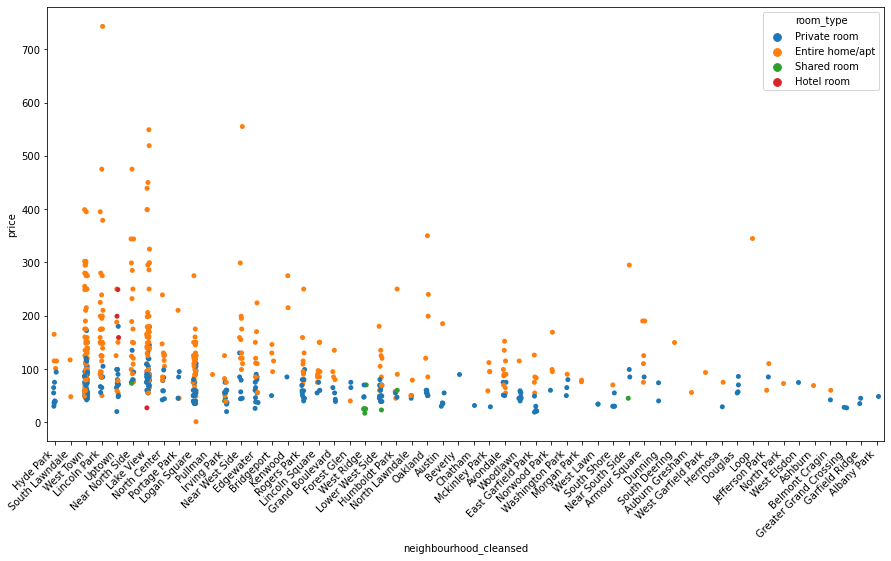

In [46]:
df_rounded = df.query('rounded_reviews_per_month>0.0')

plt.figure(figsize=(15,8))
pricebox = sns.stripplot(x="neighbourhood_cleansed", y="price", hue='room_type', data=df_rounded, jitter=True)
pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

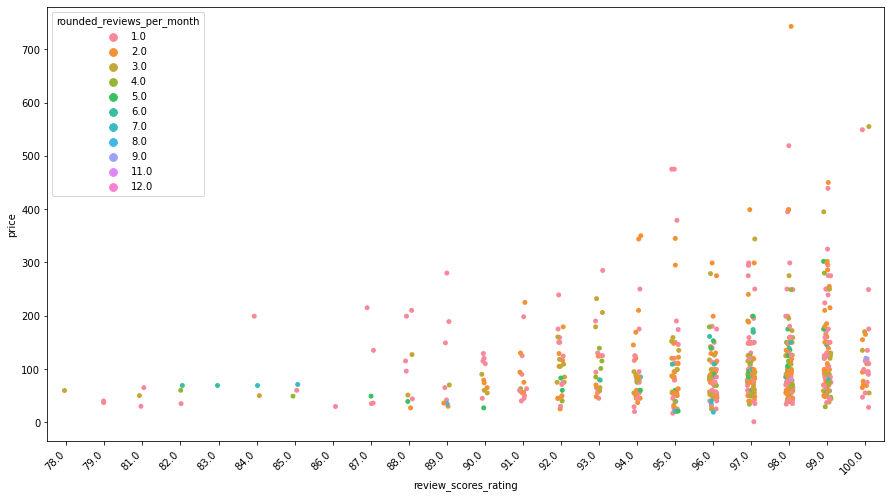

In [45]:
df_rounded = df.query('rounded_reviews_per_month>0.0')

plt.figure(figsize=(15,8))
pricebox = sns.stripplot(x="review_scores_rating", y="price", hue='rounded_reviews_per_month', data=df_rounded, jitter=True)
pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

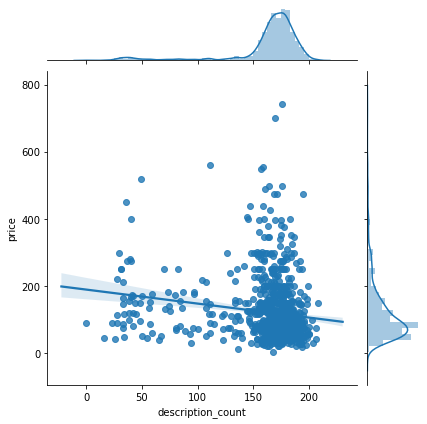

In [17]:
sns.jointplot(x='description_count', y='price', data=df, kind="reg")

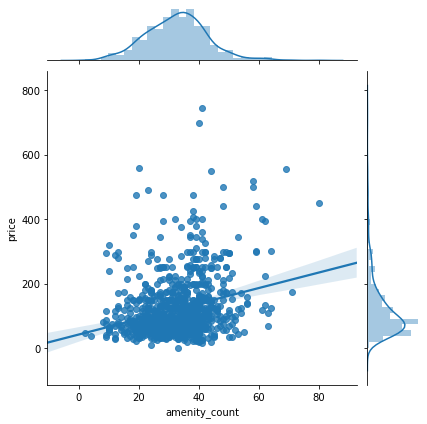

In [34]:
sns.jointplot(x='amenity_count', y='price', data=df, kind="reg")

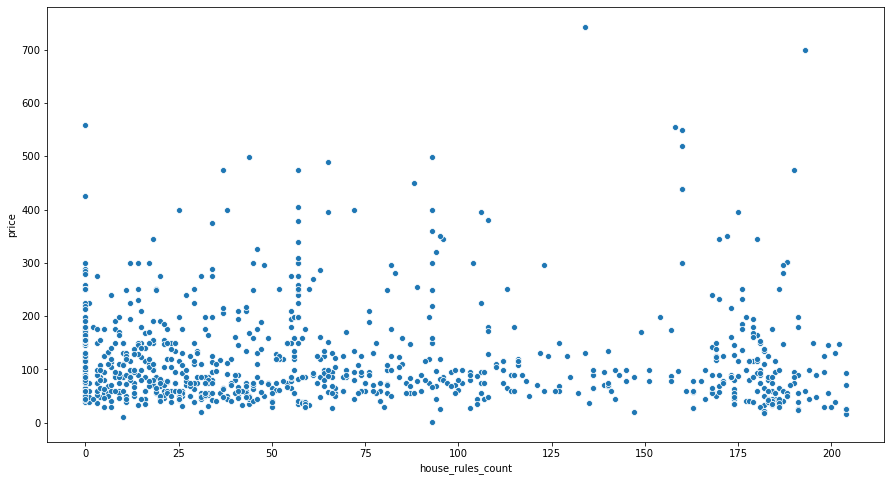

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='house_rules_count', y='price', data=df)

In [50]:
#print(df[[df['reviews_per_month' > 2.4 & 'review_score_rating' >= 98]]])
df_high_perf = df.query('reviews_per_month>=2.4 and review_scores_rating>=98')

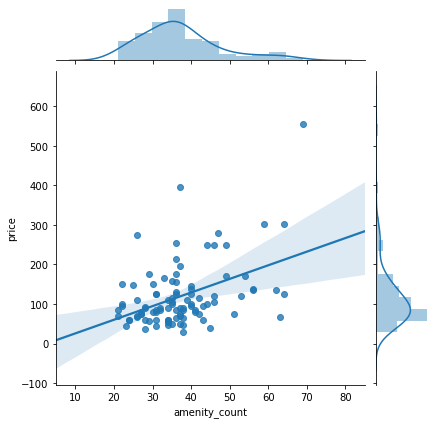

In [51]:
sns.jointplot(x='amenity_count', y='price', data=df_high_perf, kind="reg")

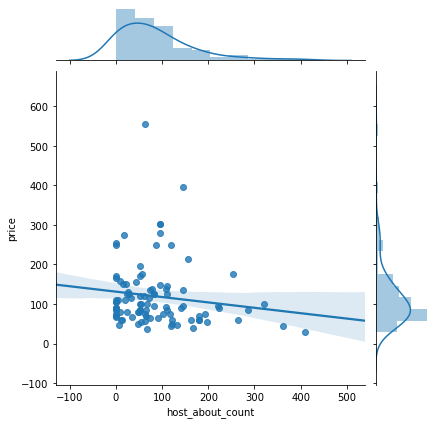

In [53]:
sns.jointplot(x='host_about_count', y='price', data=df_high_perf, kind="reg")

In [21]:
#https://stackoverflow.com/questions/57099173/how-to-calculate-most-frequently-occurring-words-in-pandas-dataframe-column-by-y
"""
from collections import Counter
import nltk

top_N = 10


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df_high_perf.description
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
"""

"\nfrom collections import Counter\nimport nltk\n\ntop_N = 10\n\n\nstopwords = nltk.corpus.stopwords.words('english')\n# RegEx for stopwords\nRE_stopwords = r'\x08(?:{})\x08'.format('|'.join(stopwords))\n# replace '|'-->' ' and drop all stopwords\nwords = (df_high_perf.description\n           .str.lower()\n           .replace([r'\\|', RE_stopwords], [' ', ''], regex=True)\n           .str.cat(sep=' ')\n           .split()\n)\n\n# generate DF out of Counter\nrslt = pd.DataFrame(Counter(words).most_common(top_N),\n                    columns=['Word', 'Frequency']).set_index('Word')\nprint(rslt)\n\n# plot\nrslt.plot.bar(rot=0, figsize=(16,10), width=0.8)\n"

In [39]:
'''
pd.set_option('display.max_rows', 100)
words = pd.Series(' '.join(df_high_perf['description'].astype(str)).lower().split(" ")).value_counts()[:100]

print(words)

#private , apartment, floor, bedroom
'''

the             716
and             635
a               497
to              358
                331
is              302
in              295
with            259
of              255
you             145
for             133
are             125
from            125
we              122
private         119
on              116
our             111
your             97
have             93
this             83
room             81
apartment        76
as               74
&                69
or               68
has              66
will             63
floor            62
there            60
one              60
space            58
living           55
bedroom          55
full             55
chicago          55
located          54
all              53
kitchen          53
an               52
2                49
access           48
house            48
street           48
that             45
it               44
can              44
walk             44
bed              42
parking          42
neighborhood     42


the        716
and        635
a          497
to         358
           331
is         302
in         295
with       259
of         255
you        145
for        133
are        125
from       125
we         122
private    119
on         116
our        111
your        97
have        93
this        83
dtype: int64